Homework 6: Does urban development have an impact on emissions?

In [ ]:
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Read in the merged file and print out the DataFrame
merged_df = pd.read_csv('merged_dataset.csv')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 47 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Unnamed: 0                                                        788 non-null    int64  
 1   Country                                                           788 non-null    object 
 2   Year_x                                                            788 non-null    int64  
 3   Data.Health.Birth Rate                                            788 non-null    float64
 4   Data.Health.Death Rate                                            788 non-null    float64
 5   Data.Health.Fertility Rate                                        788 non-null    float64
 6   Data.Health.Life Expectancy at Birth, Female                      788 non-null    float64
 7   Data.Health.Life Expectancy at Birt

Only Keep useful columns

- Data.Urban Development.Population Density - density of people living in urban areas in the particular country and year

- Data.Urban Development.Urban Population Percent - percent of the population that lives in urban areas in the given country and year

- Data.Urban Development.Urban Population Percent Growth - the population growth of urban areas in the particular country in that year

- Emissions.Production.CO2.Total - The total amount of CO2 produced (kilotons)

- Country - the name of the country that the data is taken from
- Year - the year the data of a country is taken from



In [ ]:
# Keep CO2 emissions total and Urban Development columns, keep County and Year column
merged_df = merged_df[['Country_Year', 'Country', 'Year_x', 'Emissions.Production.CO2.Total', 'Emissions.Production.N2O', 'Emissions.Production.CH4', 'Data.Urban Development.Population Density', 'Data.Urban Development.Urban Population Percent', 'Data.Urban Development.Urban Population Percent Growth']]
#rename the columns
merged_df.columns = ['Country_Year', 'Country', 'Year', 'CO2_Total', 'N2O_Total', 'CH4_Total', 'Population Density', 'Population Percent', 'Population Percent Growth']
merged_df.head()

,Country_Year,Country,Year,CO2_Total,N2O_Total,CH4_Total,Population Density,Population Percent,Population Percent Growth
0,Canada_1992,Canada,1992,463.521,41.18,73.63,3.097999,76.620,1.410113
1,Canada_1993,Canada,1993,463.993,40.96,75.22,3.136258,76.887,1.575286
2,Canada_1994,Canada,1994,478.267,43.01,76.94,3.170768,77.152,1.438397
3,Canada_1995,Canada,1995,490.951,44.34,79.95,3.201394,77.414,1.300261
4,Canada_1997,Canada,1997,521.278,44.80,83.89,3.262975,77.951,1.431860


Plot the three development variables against total CO2 emissions and check it's R^2 to see if there is any corelation

Population Density_R^2 = 0.00023153979267198643
Population Percent_R^2 = 0.00037501970629860715
Population Percent Growth_R^2 = 0.00011910486175215063


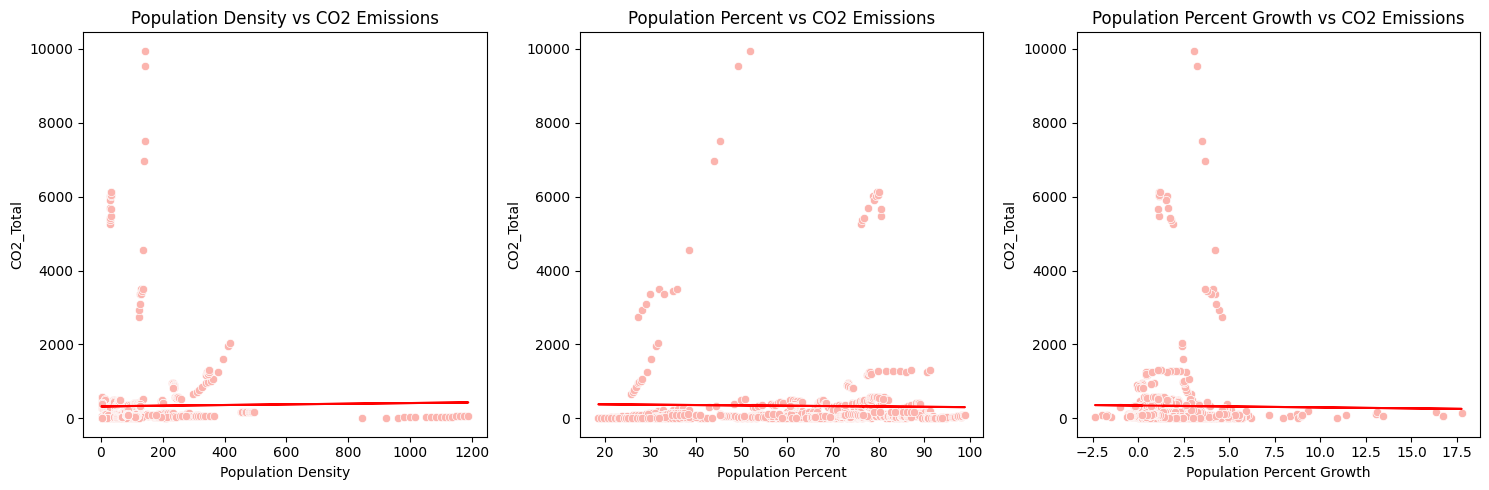

In [ ]:
# Exclude specified columns from plotting
columns_to_exclude = ['Country_Year', 'Country', 'Year', 'CO2_Total', 'N2O_Total', 'CH4_Total']

# Create the grid of plots
num_plots = len(merged_df.columns) - len(columns_to_exclude)
num_cols = 3  # Adjust the number of columns as desired
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through the columns and create plots
plot_index = 0
for col in merged_df.columns:
  if col not in columns_to_exclude:
    sns.scatterplot(ax=axes[plot_index], x=col, y='CO2_Total',  data=merged_df)
    axes[plot_index].set_title(f'{col} vs CO2 Emissions')
    axes[plot_index].set_xlabel(col)
    axes[plot_index].set_ylabel('CO2_Total')
    x = np.array(merged_df[col]).reshape(-1, 1)
    y = np.array(merged_df['CO2_Total'])
    model = LinearRegression().fit(x, y)
    axes[plot_index].plot(x, model.predict(x), color='red')
    print(f'{col}_R^2 =', model.score(x, y))
    plot_index += 1

plt.tight_layout()
plt.show()

Correlation heatmap

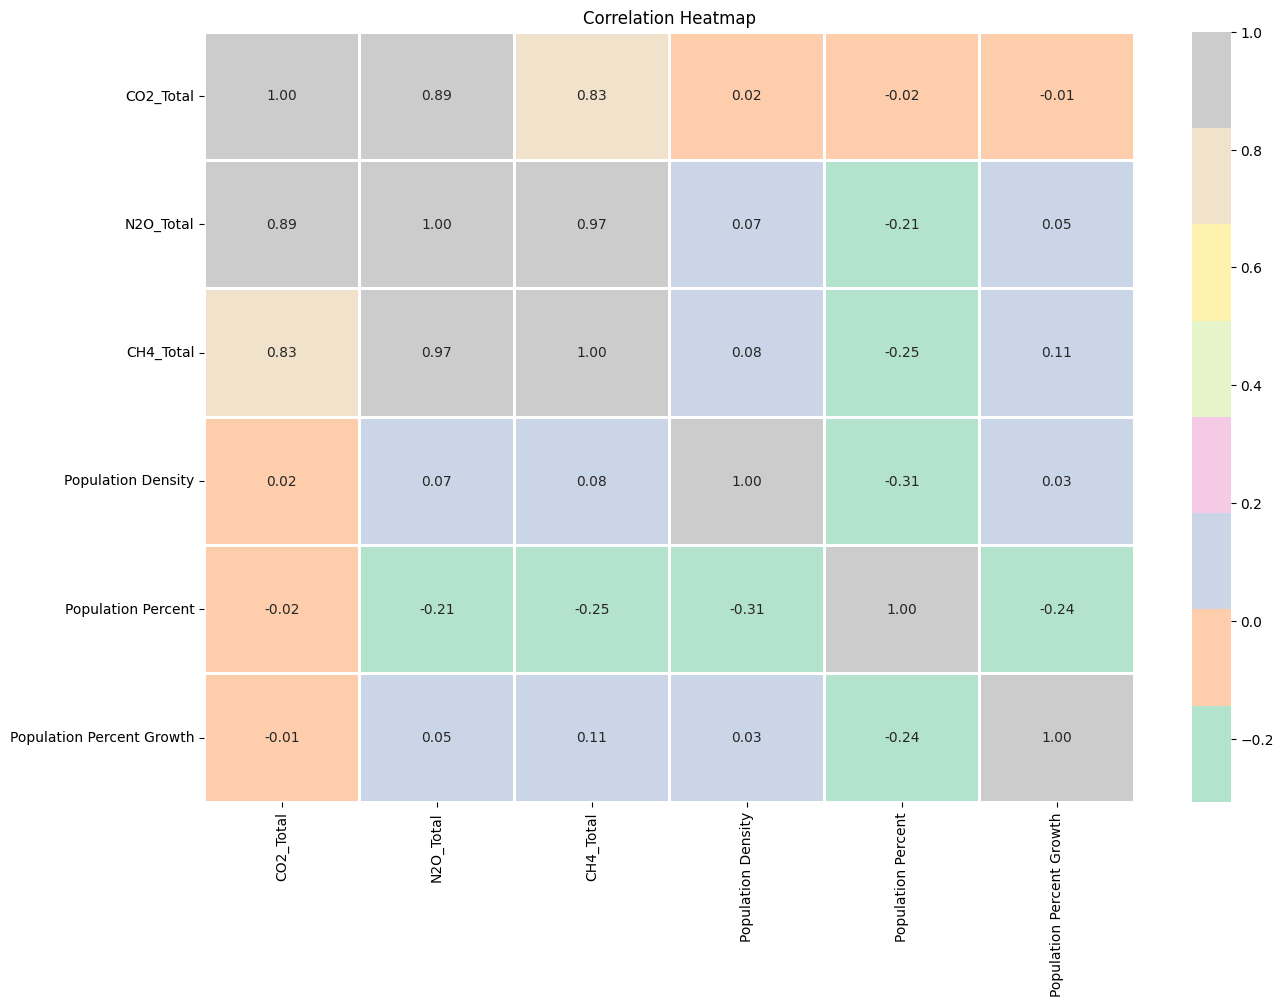

In [ ]:
#create a heatmap to showcase the correlation between the variables
plt.figure(figsize=(15, 10))
new_df = merged_df.drop(['Country_Year', 'Country', 'Year'], axis=1)
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

Categorically divide country

In [ ]:
# Convert Country column to categorical
merged_df['Country'] = merged_df['Country'].astype('category')


Pairplot the data

<Figure size 1000x600 with 0 Axes>

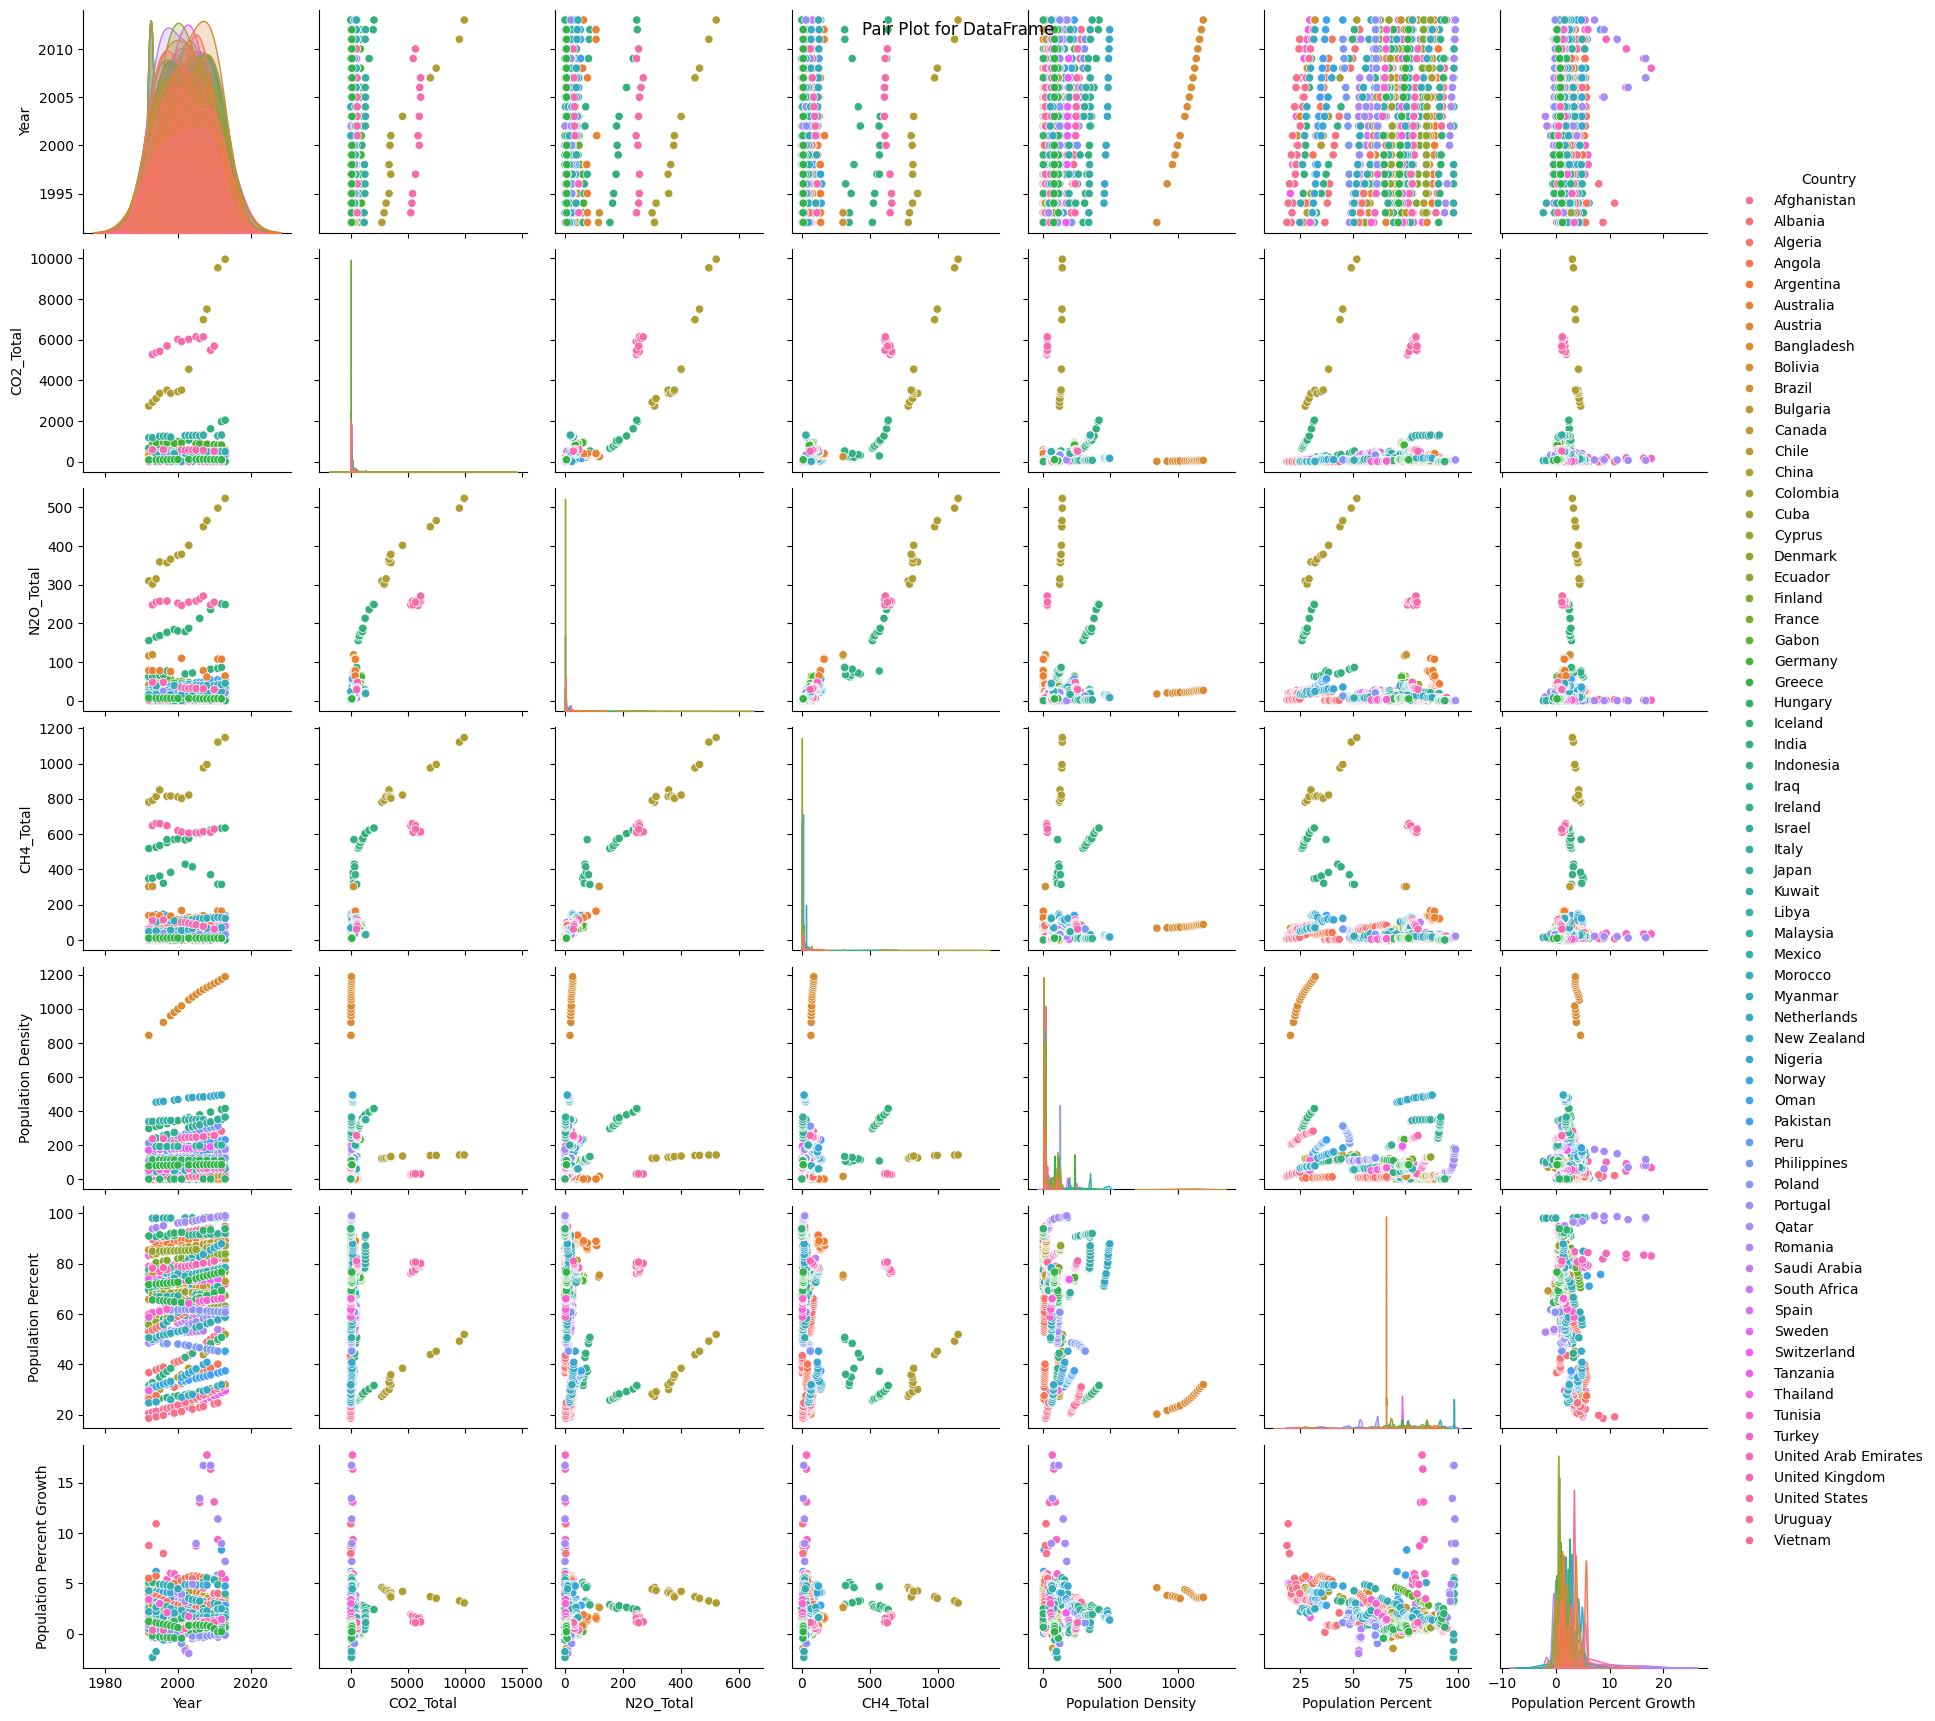

In [ ]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))
sns.pairplot(merged_df, hue = 'Country')

plt.suptitle('Pair Plot for DataFrame')
plt.show()